<a href="https://colab.research.google.com/github/daffafiartra22/K-Means-Clustering/blob/main/K_Means_Clustering_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description
The dataset used is online retail data. K-means clustering is applied here to identify the types of customers based on each customer's variables that can be analyzed through the available data. This analysis is expected to provide information about how customer types are divided based on patterns within the data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Import Data and Observing Data types, rows and columns

In [ ]:
df = pd.read_csv('OnlineRetail.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           541909 non-null  object        
 1   StockCode           541909 non-null  object        
 2   Description         540455 non-null  object        
 3   Quantity            541909 non-null  int64         
 4   InvoiceDate         541909 non-null  datetime64[ns]
 5   UnitPrice           541909 non-null  float64       
 6   CustomerID          406829 non-null  float64       
 7   Country             541909 non-null  object        
 8   Last_transact       541909 non-null  int64         
 9   Total Amount Spent  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 41.3+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Last_transact,Total Amount Spent
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,157.403319,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,0.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,51.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,142.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,256.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,373.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600303,115.883491,378.810824


# Data Cleaning

Checking Missing Values

<Axes: >

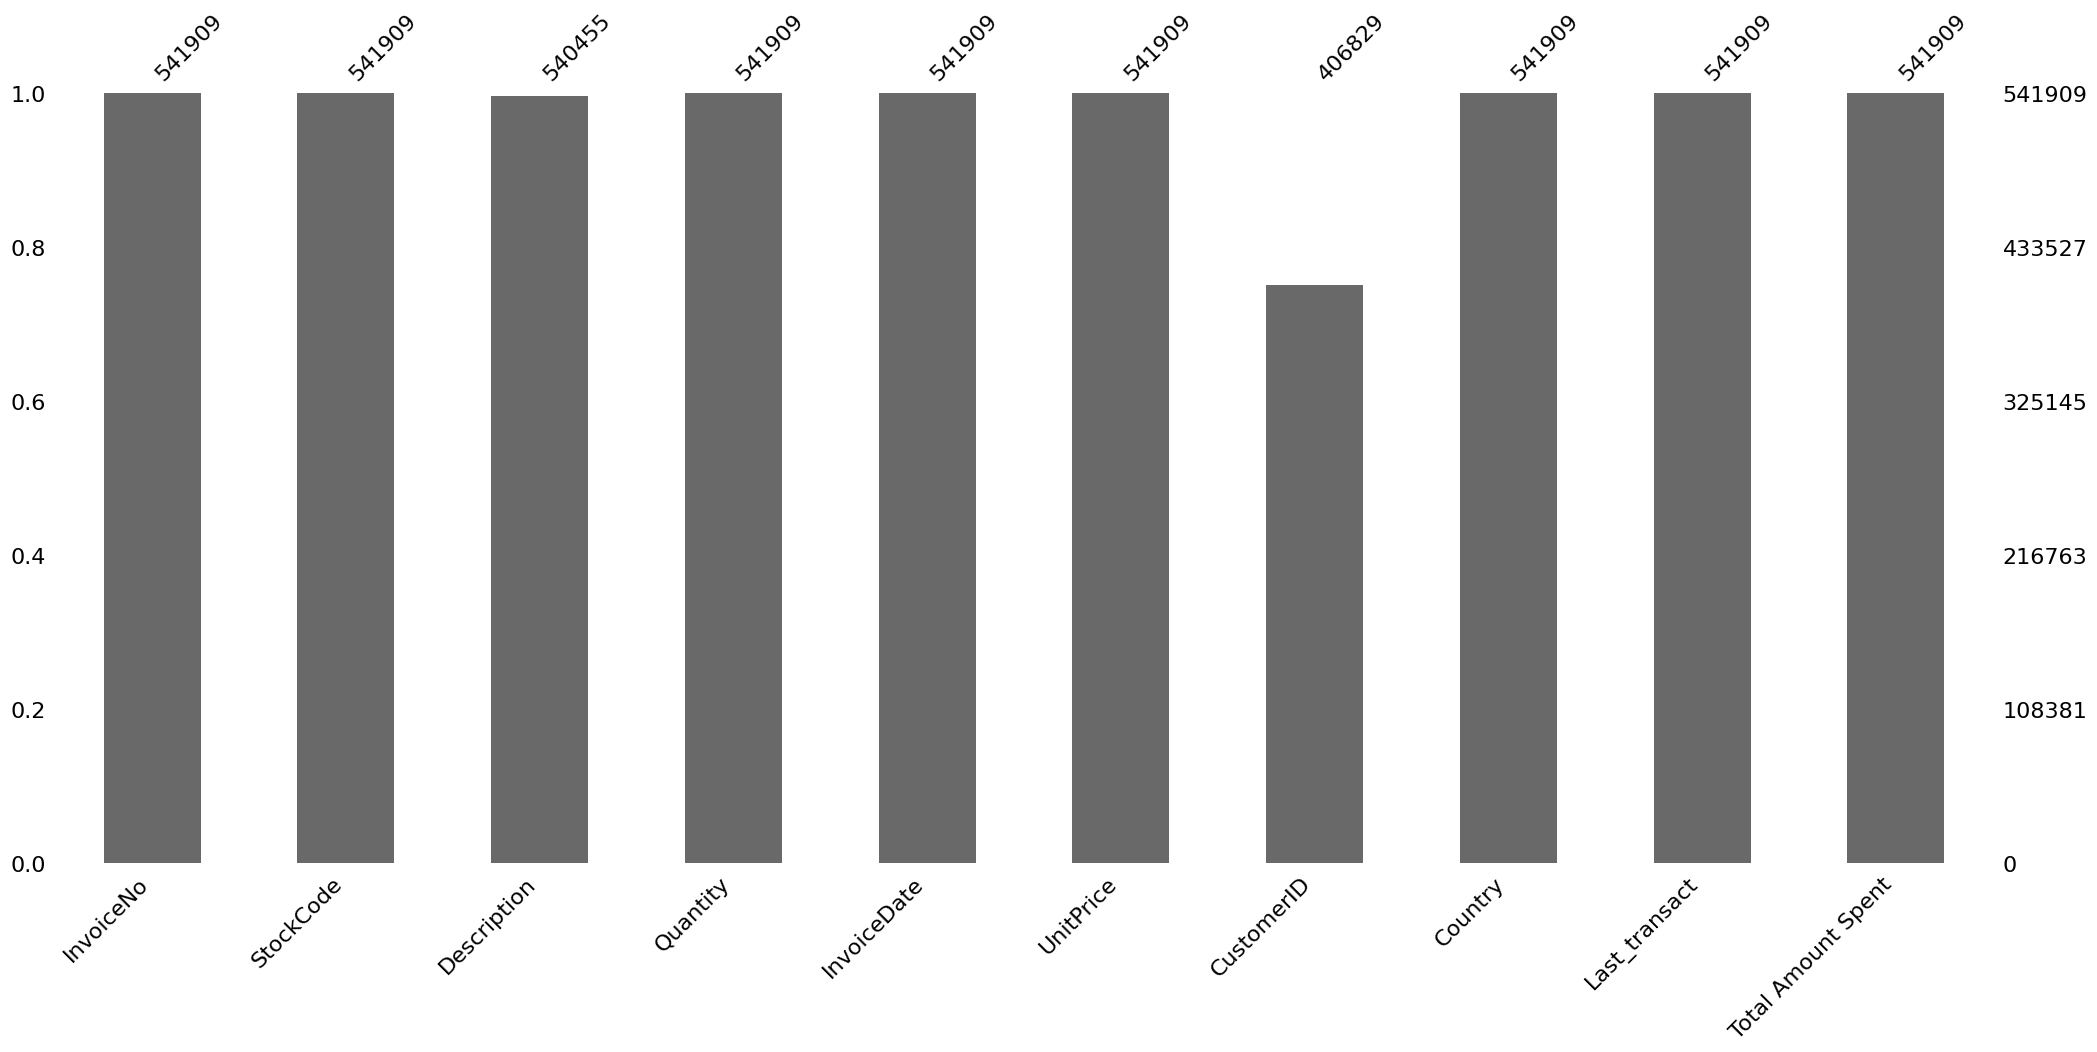

In [ ]:
msno.bar(df)

Now we have noticed that CustomerID has much missing values.Description also has a small amount of missing values.
First, we will check how many rows that are missing in details.
Then we will delete those rows.

In [ ]:
df.count()

,0
InvoiceNo,541909
StockCode,541909
Description,540455
Quantity,541909
InvoiceDate,541909
UnitPrice,541909
CustomerID,406829
Country,541909
Last_transact,541909
Total Amount Spent,541909


Calculating how big is the percentages of missing values

In [ ]:
100 - ((541909-135000)/541909 * 100)

24.911931708091203

25% of the data is missing, now we will proceed with dropping the missing rows now.

In [ ]:
df.dropna(inplace=True)

<Axes: >

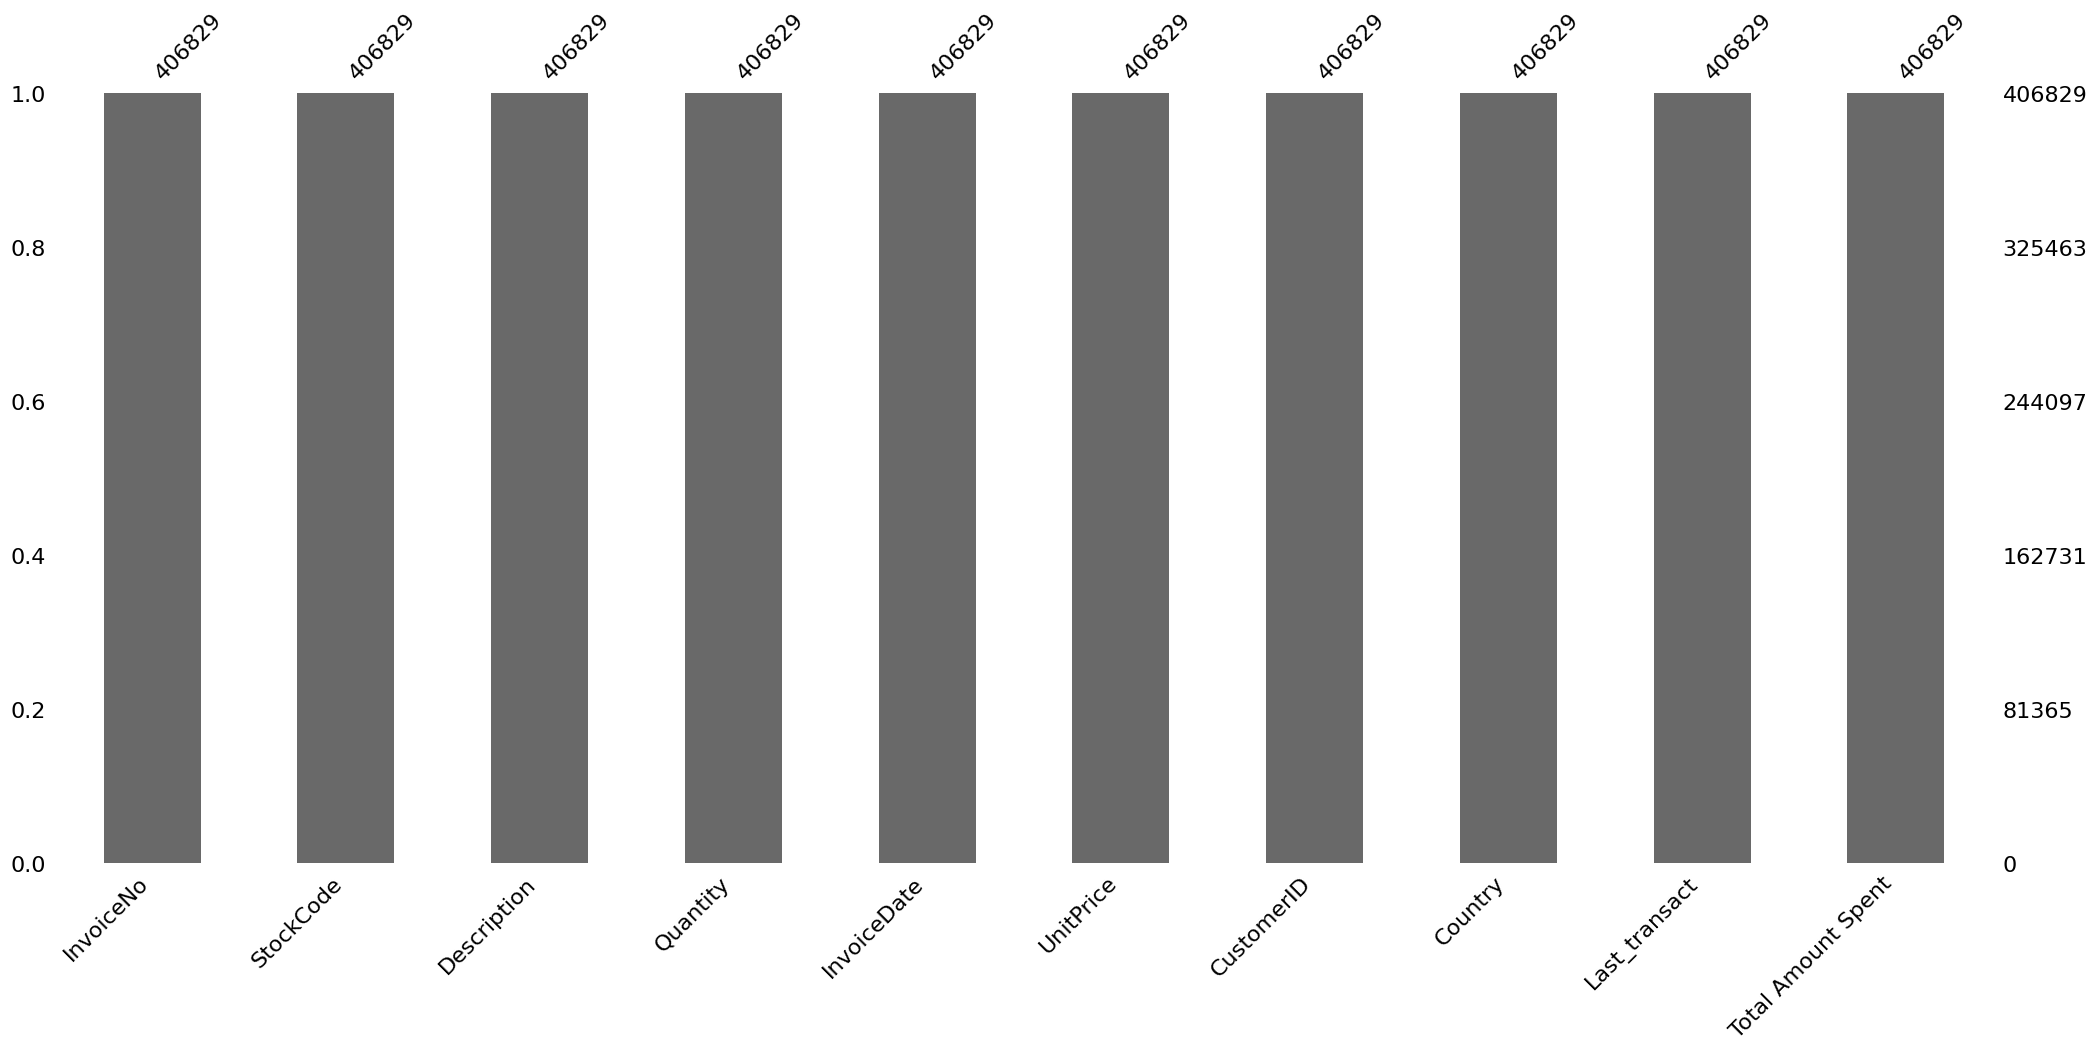

In [ ]:
msno.bar(df)

We can see that all the bars are equal now, meaning that the data is clean and ready to be used.

#Creating New Fields

We're going to create three new fields :
1. Amount
2. Number Of transactions
3. Last Transactions (describing each customers last transactions)

**Amount**


*   Creates a new column, Total Amount Spent, by multiplying the quantity (Quantity) of items by their unit price (UnitPrice).
*  Groups the data by CustomerID and calculates the sum of Total Amount Spent for each customer.
*   Converts the grouped data (a Series) into a DataFrame and resets the index, turning CustomerID into a column.





In [ ]:
df['Total Amount Spent']= df['Quantity'] * df['UnitPrice']

total_amount = df['Total Amount Spent'].groupby(df['CustomerID']).sum()
total_amount = pd.DataFrame(total_amount).reset_index()
total_amount.head()

,CustomerID,Total Amount Spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


**Number of Transactions**

*   The provided syntax calculates the number of transactions per customer using the CustomerID as a grouping key
* Groups the data by CustomerID and counts the number of InvoiceNo entries for each customer.

In [ ]:
transactions = df['InvoiceNo'].groupby(df['CustomerID']).count()
transaction = pd.DataFrame(transactions).reset_index()
transaction.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


**Last Transactions**


*   First, we will change the data type of InvoiceDate to Datetime.

*   Then we Identifies the most recent transaction date in the dataset (InvoiceDate column).
* Creates a new column, Last_transact, which represents the difference between the most recent date (final) and the transaction date (InvoiceDate), yielding the recency in days.
* Groups the data by CustomerID and finds the minimum value of Last_transact for each customer. This ensures the most recent transaction for each customer is selected.



In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
final = df['InvoiceDate'].max()
df['Last_transact'] = final - df['InvoiceDate']
df['Last_transact'] = df['Last_transact'].dt.days
LT = df.groupby(df['CustomerID']).min()['Last_transact']
LT = pd.DataFrame(LT).reset_index()
LT.head()

,CustomerID,Last_transact
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


Merging All the newly created columns

In [ ]:
df_new = pd.merge(total_amount, transaction, how='inner', on='CustomerID')
df_new = pd.merge(df_new, LT, on='CustomerID', how='inner')
df_new.head()

,CustomerID,Total Amount Spent,InvoiceNo,Last_transact
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# K-Means Clustering Model

Before we create the model, we need to decide how many clusters in K-Means we want to make. We're going to use the 'Sillhouette Score' method to measure how well each data point fits its cluster compared to others.

In [ ]:
from sklearn.cluster import KMeans

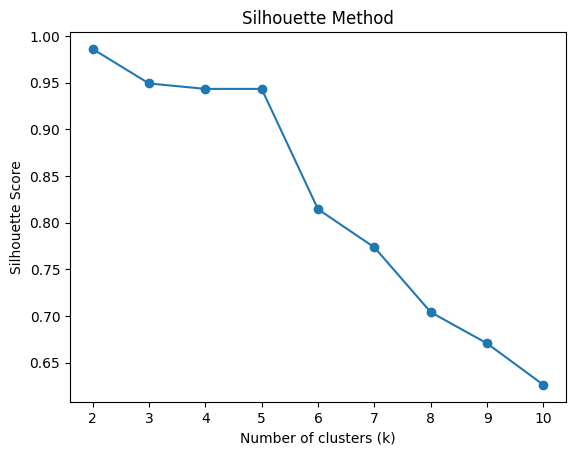

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_new[['Total Amount Spent', 'InvoiceNo', 'Last_transact']])
    labels = kmeans.labels_
    score = silhouette_score(df_new[['Total Amount Spent', 'InvoiceNo', 'Last_transact']], labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

As we can see, the number of clusters has the highest Sillhoutte Score is '2' .

In [ ]:
kmeans= KMeans(n_clusters=2)
kmeans.fit(df_new[['Total Amount Spent', 'InvoiceNo', 'Last_transact']])
pred = kmeans.predict(df_new[['Total Amount Spent', 'InvoiceNo', 'Last_transact']])

In [ ]:
kmeans.cluster_centers_

array([[1.65070406e+03, 9.06685754e+01, 9.11630783e+01],
       [1.82181982e+05, 1.82833333e+03, 6.66666667e+00]])

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
pred = pd.DataFrame(pred, columns=['pred'])
df_new = df_new.join(pred)
df_new.head()

,CustomerID,Total Amount Spent,InvoiceNo,Last_transact,pred
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,0


Clusters are created, now before visualizing we must understand what each cluster represents.

In [ ]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame to view them
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Total Amount Spent', 'InvoiceNo', 'Last_transact'])
print(cluster_centers_df)


   Total Amount Spent    InvoiceNo  Last_transact
0         1650.704060    90.668575      91.163078
1       182181.981667  1828.333333       6.666667


In [ ]:
# Filter the data by cluster labels (0 and 1)
cluster_0 = df_new[df_new['pred'] == 0]
cluster_1 = df_new[df_new['pred'] == 1]

# Calculate summary statistics for each cluster
print("Cluster 0 Description:")
print(cluster_0.describe())

print("Cluster 1 Description:")
print(cluster_1.describe())


Cluster 0 Description:
         CustomerID  Total Amount Spent    InvoiceNo  Last_transact    pred
count   4366.000000         4366.000000  4366.000000    4366.000000  4366.0
mean   15299.704764         1650.704060    90.668575      91.163078     0.0
std     1722.065808         4128.279659   211.935910     100.785610     0.0
min    12346.000000        -4287.630000     1.000000       0.000000     0.0
25%    13812.250000          292.815000    17.000000      16.000000     0.0
50%    15302.000000          646.800000    42.000000      49.000000     0.0
75%    16777.750000         1606.405000   101.000000     142.000000     0.0
max    18287.000000        88125.380000  7983.000000     373.000000     0.0
Cluster 1 Description:
         CustomerID  Total Amount Spent    InvoiceNo  Last_transact  pred
count      6.000000            6.000000     6.000000       6.000000   6.0
mean   15280.000000       182181.981667  1828.333333       6.666667   1.0
std     2129.896805        71585.164123  2100.86

* Cluster 0 seems to represent a wide variety of customers who have
spent moderately and have a relatively diverse range of purchase behaviors (infrequent vs. frequent buyers). Some customers might not have made recent transactions, indicating potential churn risk.
* Cluster 1 seems to represent a niche group of high-value, active customers who have made significant recent purchases. Although the size of the cluster is small, these customers are likely highly engaged and represent a valuable segment.



<ipython-input-44-49b99a34b414>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ty=sns.stripplot(x='pred', y='Total Amount Spent', data=df_new, s=8, ax = ax[0], palette='magma_r')
<ipython-input-44-49b99a34b414>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  tt=sns.boxplot(x='pred', y='InvoiceNo', data=df_new, ax = ax[1], palette='coolwarm_r')
<ipython-input-44-49b99a34b414>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  tr=sns.boxplot(x='pred', y='Last_transact', data=df_new, ax = ax[2], palette='magma_r')


Text(0.5, 0, 'Clusters')

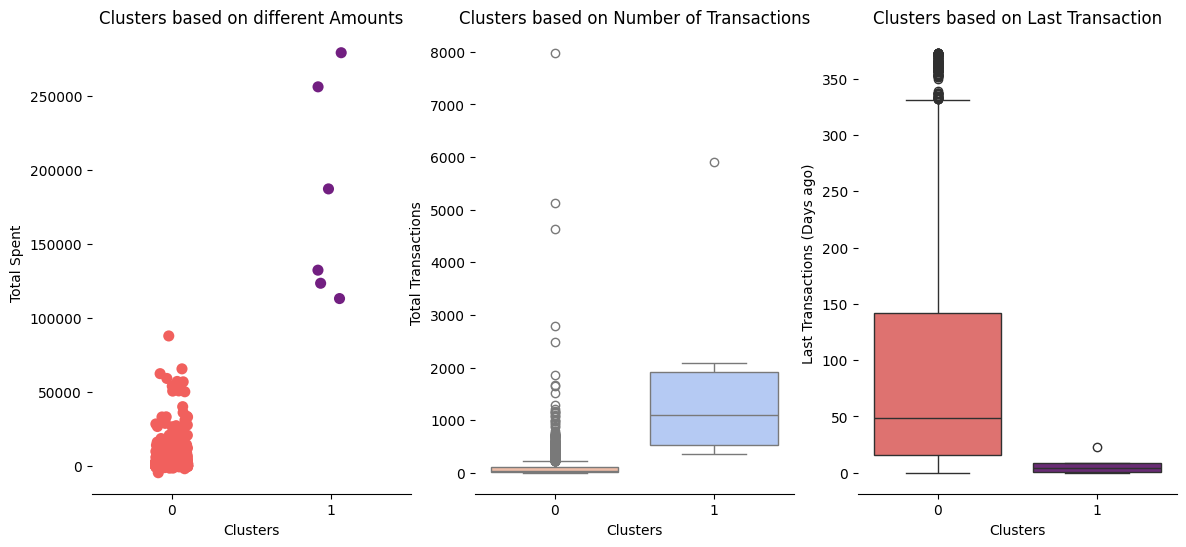

In [ ]:
fig, ax =plt.subplots(nrows= 1, ncols = 3, figsize= (14,6))
ty=sns.stripplot(x='pred', y='Total Amount Spent', data=df_new, s=8, ax = ax[0], palette='magma_r')
sns.despine(left=True)
ty.set_title('Clusters based on different Amounts')
ty.set_ylabel('Total Spent')
ty.set_xlabel('Clusters')

tt=sns.boxplot(x='pred', y='InvoiceNo', data=df_new, ax = ax[1], palette='coolwarm_r')
tt.set_title('Clusters based on Number of Transactions')
tt.set_ylabel('Total Transactions')
tt.set_xlabel('Clusters')

tr=sns.boxplot(x='pred', y='Last_transact', data=df_new, ax = ax[2], palette='magma_r')
tr.set_title('Clusters based on Last Transaction')
tr.set_ylabel('Last Transactions (Days ago)')
tr.set_xlabel('Clusters')

**Cluster based on different Amounts**
* Cluster 0 seems to represent a wide variety of customers who have
spent moderately and have a relatively diverse range of purchase behaviors (infrequent vs. frequent buyers). Some customers might not have made recent transactions, indicating potential churn risk.
* Cluster 1 seems to represent a niche group of high-value, active customers who have made significant recent purchases. Although the size of the cluster is small, these customers are likely highly engaged and represent a valuable segment.

**Cluster based on Number of Transactions**
* Cluster 0 includes both infrequent and some very active buyers, indicating wide variability.
* Cluster 1 represents a more consistent group of customers who purchase more frequently.

**Cluster based on Last Transactions**
* Cluster 0 contains a significant number of disengaged or potentially at-risk customers.
* Cluster 1 represents highly engaged customers who are actively transacting.

Here is the pair plot for more detailed graphs and analysis.

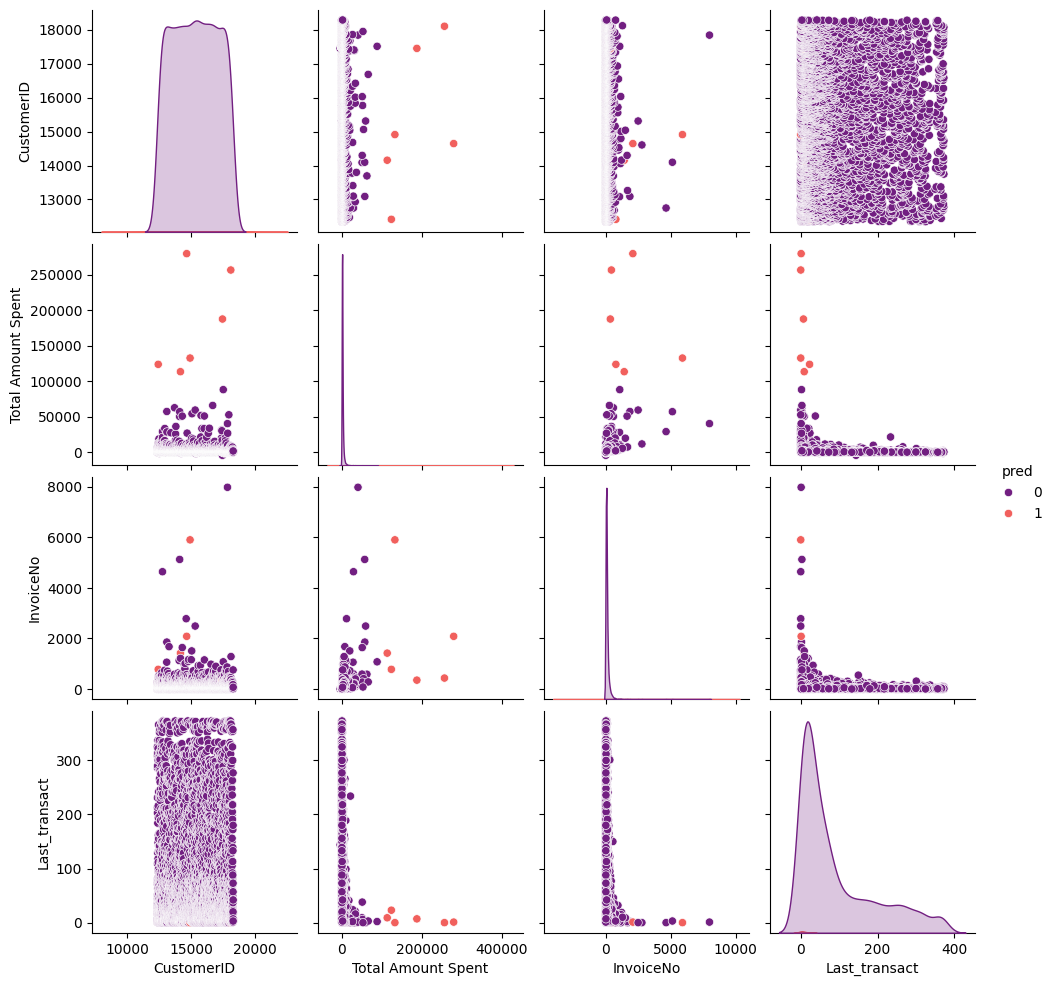

In [ ]:
sns.pairplot(hue='pred', data=df_new, diag_kind='kde', palette='magma')